In [140]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
%matplotlib inline

### Data importation ###

In [141]:
data = []
with open('data/chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        line = line.replace('\t', '')
        data.append(line.split(','))

names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class']

df = pd.DataFrame(data[145:], columns=names)
for c in df.columns:
    df.loc[df[c] == '?', c] = np.nan
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
2,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
3,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
4,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


### Nan imputation ###


In [142]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      151
pc        65
pcc        4
ba         4
bgr       43
bu        19
sc        17
sod       85
pot       86
hemo      52
pcv       71
wbcc     106
rbcc     129
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [143]:
cat_feat = ["rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","class"]
num_feat = {var: df[var] for var in df if var not in cat_feat}
num_featList = list(num_feat.keys())
df_cat =df.drop(columns=num_featList)
for var in cat_feat:
    df_cat[var].fillna(df_cat[var].mode()[0],inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df[num_featList])
meanImp=imp_mean.transform(df[num_featList])
meanImpDF=pd.DataFrame(meanImp,columns=num_featList)
df=pd.concat([meanImpDF,df_cat],axis=1)
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,121.0,36.0,1.2,137.613782,4.634084,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,51.0,80.000000,1.010,2.0,0.0,106.0,26.0,1.4,137.613782,4.634084,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,60.0,90.000000,1.015,3.0,0.0,74.0,25.0,1.1,142.000000,3.200000,...,normal,notpresent,notpresent,yes,yes,no,good,yes,no,ckd
3,68.0,70.000000,1.010,0.0,0.0,100.0,54.0,24.0,104.000000,4.000000,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
4,24.0,76.545455,1.015,2.0,4.0,410.0,31.0,1.1,137.613782,4.634084,...,abnormal,notpresent,notpresent,no,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,80.000000,1.020,0.0,0.0,140.0,49.0,0.5,150.000000,4.900000,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
393,42.0,70.000000,1.025,0.0,0.0,75.0,31.0,1.2,141.000000,3.500000,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
394,12.0,80.000000,1.020,0.0,0.0,100.0,26.0,0.6,137.000000,4.400000,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
395,17.0,60.000000,1.025,0.0,0.0,114.0,50.0,1.0,135.000000,4.900000,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [144]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### Data encoding ###


In [145]:
le = preprocessing.LabelEncoder()
df[cat_feat] = df[cat_feat].apply(le.fit_transform)
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,121.0,36.0,1.2,137.613782,4.634084,...,1,0,0,1,1,0,0,0,0,0
1,51.0,80.000000,1.010,2.0,0.0,106.0,26.0,1.4,137.613782,4.634084,...,1,0,0,0,0,0,0,0,0,0
2,60.0,90.000000,1.015,3.0,0.0,74.0,25.0,1.1,142.000000,3.200000,...,1,0,0,1,1,0,0,1,0,0
3,68.0,70.000000,1.010,0.0,0.0,100.0,54.0,24.0,104.000000,4.000000,...,1,0,0,0,0,0,0,0,0,0
4,24.0,76.545455,1.015,2.0,4.0,410.0,31.0,1.1,137.613782,4.634084,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,80.000000,1.020,0.0,0.0,140.0,49.0,0.5,150.000000,4.900000,...,1,0,0,0,0,0,0,0,0,1
393,42.0,70.000000,1.025,0.0,0.0,75.0,31.0,1.2,141.000000,3.500000,...,1,0,0,0,0,0,0,0,0,1
394,12.0,80.000000,1.020,0.0,0.0,100.0,26.0,0.6,137.000000,4.400000,...,1,0,0,0,0,0,0,0,0,1
395,17.0,60.000000,1.025,0.0,0.0,114.0,50.0,1.0,135.000000,4.900000,...,1,0,0,0,0,0,0,0,0,1


In [146]:
le.inverse_transform(df["class"])

array(['ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd',

In [147]:
for var in num_feat:
    df[var] = pd.to_numeric(df[var])
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
rbc        int32
pc         int32
pcc        int32
ba         int32
htn        int32
dm         int32
cad        int32
appet      int32
pe         int32
ane        int32
class      int32
dtype: object

### Outliers' imputation ###


age        AxesSubplot(0.125,0.749828;0.133621x0.130172)
bp      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sg       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
al      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
su      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
bgr        AxesSubplot(0.125,0.593621;0.133621x0.130172)
bu      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
sc       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sod     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pot     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
hemo       AxesSubplot(0.125,0.437414;0.133621x0.130172)
pcv     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
wbcc     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
rbcc    AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

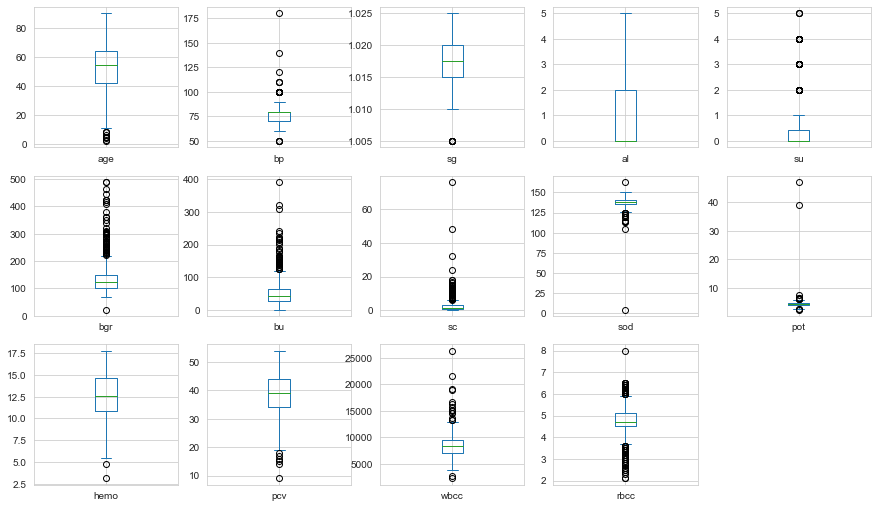

In [148]:
plt.Figure(figsize=(10, 6))
df1=df.copy()
df1.drop(columns=cat_feat).plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))

In [149]:
def outliers_imputation(df):
    listU = [2]
    listL = [2]
    while len(listL)>0 and len(listU)>0:
        outliers_bound_L = dict()
        outliers_bound_U = dict()
        ratio = dict()
        ratioU = dict()
        ratioL= dict()
        important_feature_modified = num_featList.copy()
        listU = []
        listL = []
        for val in important_feature_modified:
            price = df[val].describe()
            outliers_bound_U[val] = price.loc["75%"] + 1.5 * (price.loc["75%"] - price.loc["25%"])
            outliers_bound_L[val] = price.loc["25%"] - 1.5 * (price.loc["75%"] - price.loc["25%"])
            ratio[val] = (len(df[df[val] > outliers_bound_U[val]]) + len(df[df[val] < outliers_bound_L[val]]) / len(df[val]))
            ratioU[val] = (len(df[df[val] > outliers_bound_U[val]]) / len(df[val]))
            ratioL[val] = (len(df[df[val] < outliers_bound_L[val]]) / len(df[val]))
        for var in ratioU:
            if ratioU[var] > 0:
                listU.append(var)
        for var in ratioL:
            if ratioL[var] !=0:
                listL.append(var)
        for val in listU:
            df.loc[df[val] > outliers_bound_U[val], val] = df[val].mean()
        for val in listL:
            df.loc[df[val] < outliers_bound_L[val], val] = df[val].mean()
    return df

In [150]:
df = outliers_imputation(df)
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.000000,1.020,1.0,0.000000,121.000000,36.0,1.200000,137.613782,4.634084,...,1,0,0,1,1,0,0,0,0,0
1,51.000000,80.000000,1.010,2.0,0.000000,106.000000,26.0,1.400000,137.613782,4.634084,...,1,0,0,0,0,0,0,0,0,0
2,60.000000,90.000000,1.015,3.0,0.000000,74.000000,25.0,1.100000,138.059093,3.200000,...,1,0,0,1,1,0,0,1,0,0
3,68.000000,70.000000,1.010,0.0,0.000000,100.000000,54.0,3.079868,137.549837,4.000000,...,1,0,0,0,0,0,0,0,0,0
4,24.000000,76.545455,1.015,2.0,0.445402,147.347458,31.0,1.100000,137.613782,4.634084,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55.000000,80.000000,1.020,0.0,0.000000,140.000000,49.0,0.500000,138.600964,4.900000,...,1,0,0,0,0,0,0,0,0,1
393,42.000000,70.000000,1.025,0.0,0.000000,75.000000,31.0,1.200000,138.095514,3.500000,...,1,0,0,0,0,0,0,0,0,1
394,52.625789,80.000000,1.020,0.0,0.000000,100.000000,26.0,0.600000,137.000000,4.400000,...,1,0,0,0,0,0,0,0,0,1
395,17.000000,60.000000,1.025,0.0,0.000000,114.000000,50.0,1.000000,137.676095,4.900000,...,1,0,0,0,0,0,0,0,0,1


In [151]:
df[num_featList].describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,52.935304,74.530473,1.017645,0.997151,0.140450,126.255191,43.757521,1.895018,137.833743,4.411939,12.585605,39.493679,8178.904225,4.681883
std,14.921009,9.206830,0.005110,1.258303,0.247276,30.821197,19.709090,1.256398,0.333518,0.539698,2.650470,7.327812,211.533546,0.065640
min,14.000000,60.000000,1.010000,0.000000,0.000000,70.000000,1.500000,0.400000,137.000000,3.000000,5.500000,22.000000,7700.000000,4.500000
25%,44.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,137.613782,4.000000,10.900000,35.000000,8075.980106,4.621194
50%,54.000000,76.545455,1.017457,0.000000,0.000000,126.918542,44.000000,1.400000,137.676095,4.634084,12.542319,38.932515,8134.248614,4.710448
75%,64.000000,80.000000,1.020000,2.000000,0.445402,147.347458,57.545503,3.079868,138.095514,4.700000,14.700000,44.000000,8423.367698,4.710448
max,90.000000,90.000000,1.025000,5.000000,1.000000,215.000000,103.000000,6.300000,138.600964,5.700000,17.800000,54.000000,8800.000000,4.800000


age        AxesSubplot(0.125,0.749828;0.133621x0.130172)
bp      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
sg       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
al      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
su      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
bgr        AxesSubplot(0.125,0.593621;0.133621x0.130172)
bu      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
sc       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
sod     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pot     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
hemo       AxesSubplot(0.125,0.437414;0.133621x0.130172)
pcv     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
wbcc     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
rbcc    AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

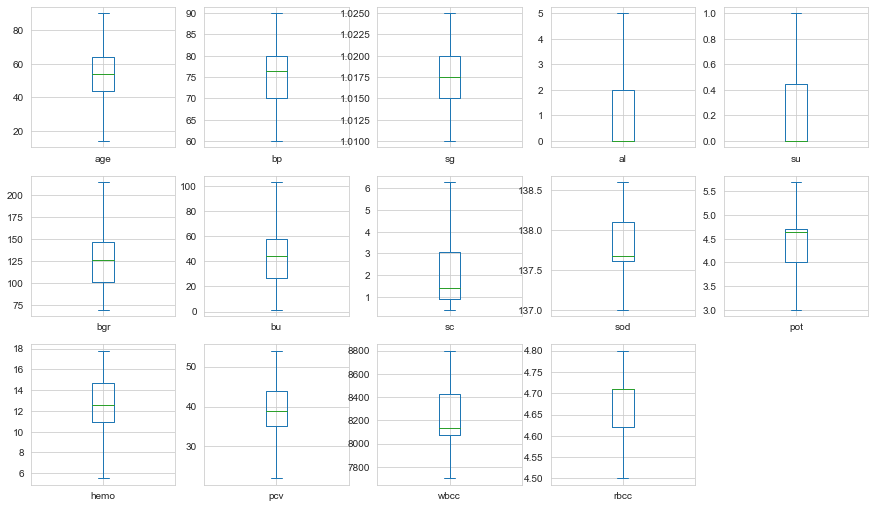

In [152]:
plt.Figure(figsize=(10, 6))
df2=df.copy()
df2.drop(columns=cat_feat).plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15))

### Feature selection ###


In [153]:
X = df.drop(columns=['class'])
y = df['class']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# X_train, X_test, y_train, y_test = kf.split(X, y)
scores = []
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((277, 24), (277,), (120, 24), (120,))

In [154]:
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [155]:
accurancy=0
nbr=0
for var in range(1,24):
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=var, verbose=1)
    rfe.fit(X_train_std, y_train)
    print("accuracy of "+ str(var)+ " : "+str(accuracy_score(y_test, rfe.predict(X_test_std))))
    if accuracy_score(y_test, rfe.predict(X_test_std))>accurancy:
        accurancy=accuracy_score(y_test, rfe.predict(X_test_std))
        nbr=var
print(nbr,accurancy)

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
accuracy of 1 : 0.875
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estima

In [156]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=nbr, verbose=1)
rfe.fit(X_train_std, y_train)

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


RFE(estimator=LogisticRegression(), n_features_to_select=14, verbose=1)

In [157]:
X.columns[rfe.support_]

Index(['sg', 'al', 'su', 'sc', 'sod', 'hemo', 'pcv', 'wbcc', 'rbc', 'pc',
       'htn', 'dm', 'appet', 'pe'],
      dtype='object')

In [158]:
print(dict(zip(X.columns, rfe.ranking_)))

{'age': 11, 'bp': 2, 'sg': 1, 'al': 1, 'su': 1, 'bgr': 3, 'bu': 8, 'sc': 1, 'sod': 1, 'pot': 10, 'hemo': 1, 'pcv': 1, 'wbcc': 1, 'rbcc': 7, 'rbc': 1, 'pc': 1, 'pcc': 4, 'ba': 6, 'htn': 1, 'dm': 1, 'cad': 9, 'appet': 1, 'pe': 1, 'ane': 5}


In [159]:
print(accuracy_score(y_test, rfe.predict(X_test_std)))

0.9833333333333333


In [160]:
importedFeature = list(X.columns[rfe.support_])
print(importedFeature,"number of important features : "+str(len(importedFeature)))

['sg', 'al', 'su', 'sc', 'sod', 'hemo', 'pcv', 'wbcc', 'rbc', 'pc', 'htn', 'dm', 'appet', 'pe'] number of important features : 14


In [161]:
cleanDf=df[importedFeature].copy()
cleanDf=pd.concat([cleanDf,df["class"]],axis=1)
cleanDf

,sg,al,su,sc,sod,hemo,pcv,wbcc,rbc,pc,htn,dm,appet,pe,class
0,1.020,1.0,0.000000,1.200000,137.613782,15.4,44.0,7800.000000,1,1,1,1,0,0,0
1,1.010,2.0,0.000000,1.400000,137.613782,11.6,35.0,8163.979864,1,1,0,0,0,0,0
2,1.015,3.0,0.000000,1.100000,138.059093,12.2,39.0,7800.000000,1,1,1,1,0,1,0
3,1.010,0.0,0.000000,3.079868,137.549837,12.4,36.0,8423.367698,1,1,0,0,0,0,0
4,1.015,2.0,0.445402,1.100000,137.613782,12.4,44.0,8088.856877,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1.020,0.0,0.000000,0.500000,138.600964,15.7,47.0,8088.856877,1,1,0,0,0,0,1
393,1.025,0.0,0.000000,1.200000,138.095514,16.5,54.0,7800.000000,1,1,0,0,0,0,1
394,1.020,0.0,0.000000,0.600000,137.000000,15.8,49.0,7886.569798,1,1,0,0,0,0,1
395,1.025,0.0,0.000000,1.000000,137.676095,14.2,51.0,8153.280930,1,1,0,0,0,0,1


### Classification ###


##### Display function #####

In [162]:
def display_roc(fpr_dt,tpr2_dt, colr, label,roc_auc_algo):
    plt.figure(figsize=(7,7))
    plt.plot(fpr_dt, tpr2_dt, color=colr, lw=2, label=label+'(area = %0.2f)'% roc_auc_algo)

    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classifiers ROC curves')
    plt.legend(loc = "lower right")
    plt.show()

In [163]:
def display_confusion_matrix(algo,xtest,ytest):
    color = 'black'
    matrix = plot_confusion_matrix(algo, xtest, ytest, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.show()

##### Scaling #####

In [164]:
X = cleanDf.drop(columns=['class'])
y = cleanDf['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [165]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train,columns=importedFeature)
X_test = pd.DataFrame(X_test,columns=importedFeature)

##### KNN Classifier #####


In [166]:
max_k_val=np.round(np.sqrt(meanImpDF.count().unique().sum())).astype(int)
max_k_val

20

C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

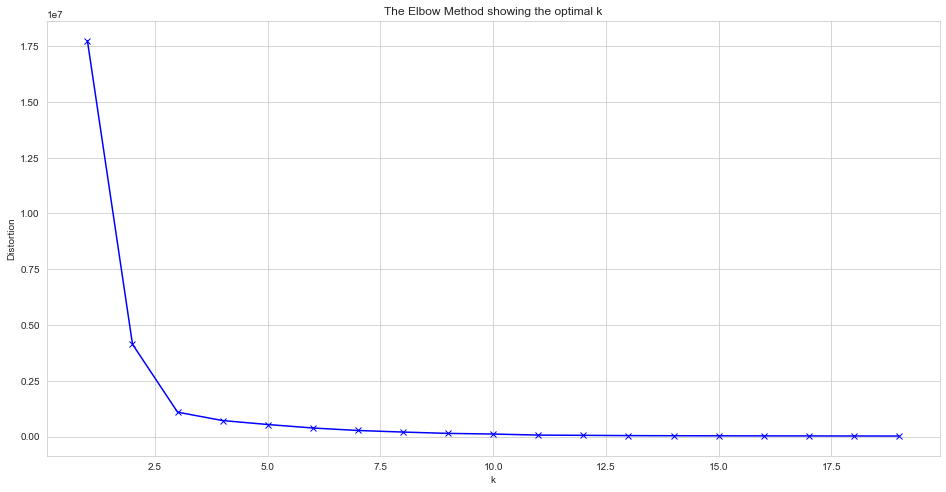

In [167]:
distortions = []
K = range(1,max_k_val)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cleanDf)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Text(0, 0.5, 'Score')

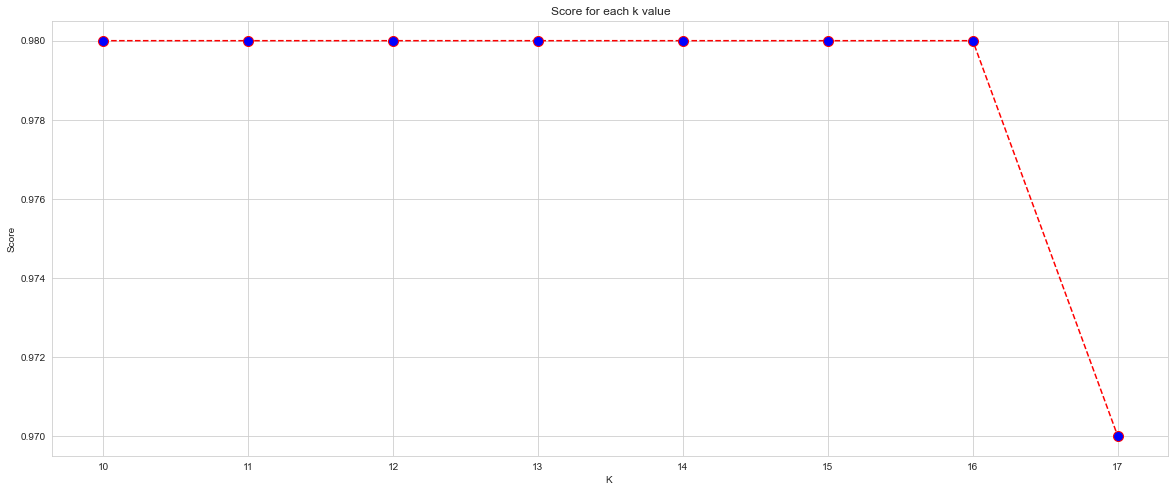

In [168]:
score=[]
# Calculate score for k between 7 and 18
for i in range(10, 18):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    score.append(knn_model.score(X_test, y_test))
plt.figure(figsize=(20, 8))
plt.plot(range(10, 18), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

In [169]:
k=10
knn = KNeighborsClassifier(k)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [170]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.98


In [171]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.95      1.00      0.98        40

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



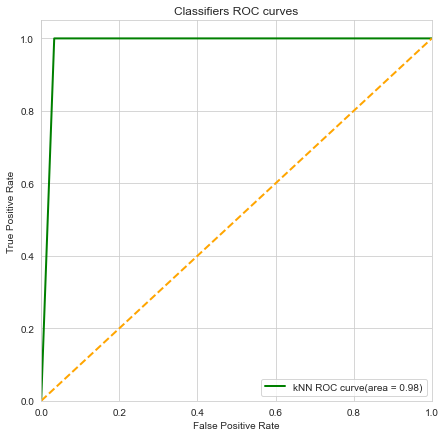

In [172]:
fpr_knn, tpr_knn, threshold2 = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
display_roc(fpr_knn,tpr_knn,"green","kNN ROC curve",roc_auc_knn)

C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


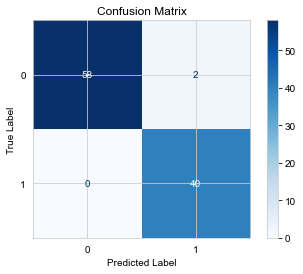

In [173]:
display_confusion_matrix(knn,X_test,y_test)

##### SVM #####

In [174]:
# sns.pairplot(cleanDf, hue="class")

In [175]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [176]:
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [177]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.98      0.99        41

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


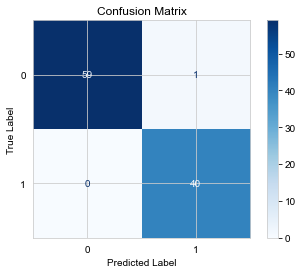

In [178]:
display_confusion_matrix(svm,X_test,y_test)

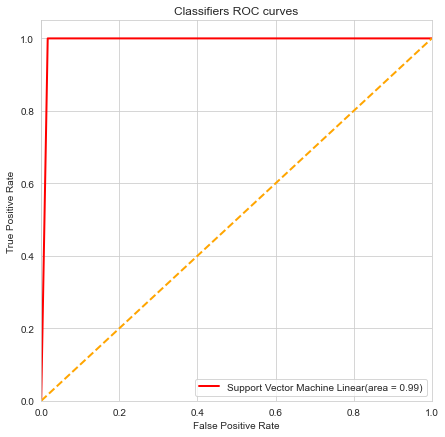

In [179]:
fpr_svm, tpr2_svm, threshold_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr2_svm)
display_roc(fpr_svm,tpr2_svm,"red","Support Vector Machine Linear",roc_auc_svm)


##### Random Forest #####

In [180]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

In [181]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest  classifier on test set: {:.2f}' .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest  classifier on test set: 1.00


In [182]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


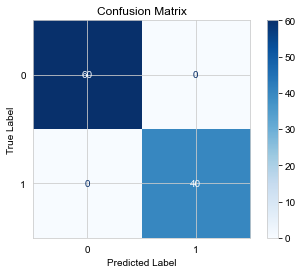

In [183]:
display_confusion_matrix(rfc,X_test,y_test)

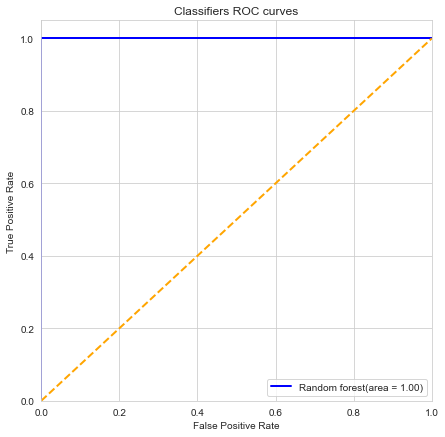

In [184]:
fpr_rf, tpr2_rf, threshold_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr2_rf)
display_roc(fpr_rf,tpr2_rf,"blue","Random forest",roc_auc_rf)

##### Decision Tree #####

In [185]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [186]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [187]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      0.97      0.96        39

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


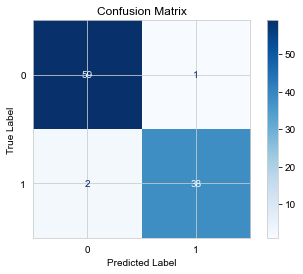

In [188]:
display_confusion_matrix(dt,X_test,y_test)

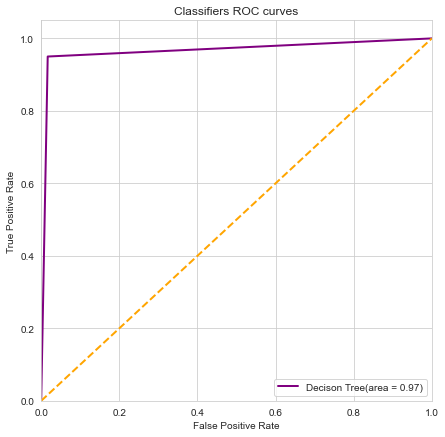

In [189]:
fpr_dt, tpr2_dt, threshold_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr2_dt)
display_roc(fpr_dt, tpr2_dt, "purple", "Decison Tree",roc_auc_dt)

##### Auc plot for all models #####

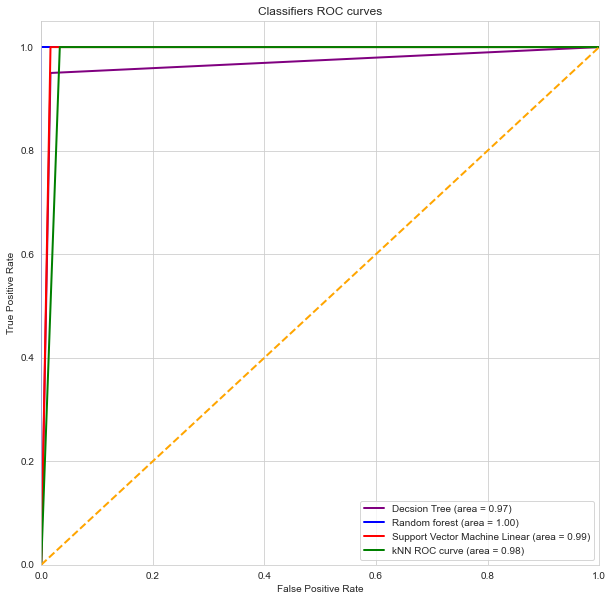

In [190]:
plt.figure(figsize=(10,10))
plt.plot(fpr_dt, tpr2_dt, color='purple', lw=2, label='Decsion Tree (area = %0.2f)'% roc_auc_dt)
plt.plot(fpr_rf, tpr2_rf, color='blue', lw=2, label='Random forest (area = %0.2f)'% roc_auc_rf)
plt.plot(fpr_svm, tpr2_svm, color='red', lw=2, label='Support Vector Machine Linear (area = %0.2f)'% roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc_knn)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

##### ANN Classification #####

In [198]:
# Train the ANN
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, alpha=0.0001,
                    solver='sgd', verbose=10, random_state=21, tol=0.000000001)
mlp.fit(X_train, y_train)

# Evaluate the trained ANN on the test set
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.67755226
Iteration 2, loss = 0.67645426
Iteration 3, loss = 0.67475585
Iteration 4, loss = 0.67260095
Iteration 5, loss = 0.67002231
Iteration 6, loss = 0.66717021
Iteration 7, loss = 0.66405748
Iteration 8, loss = 0.66081344
Iteration 9, loss = 0.65740692
Iteration 10, loss = 0.65393148
Iteration 11, loss = 0.65031844
Iteration 12, loss = 0.64668031
Iteration 13, loss = 0.64306437
Iteration 14, loss = 0.63937715
Iteration 15, loss = 0.63571783
Iteration 16, loss = 0.63206781
Iteration 17, loss = 0.62848651
Iteration 18, loss = 0.62488733
Iteration 19, loss = 0.62134293
Iteration 20, loss = 0.61788027
Iteration 21, loss = 0.61444445
Iteration 22, loss = 0.61106848
Iteration 23, loss = 0.60778308
Iteration 24, loss = 0.60451157
Iteration 25, loss = 0.60137214
Iteration 26, loss = 0.59816342
Iteration 27, loss = 0.59509960
Iteration 28, loss = 0.59203576
Iteration 29, loss = 0.58903292
Iteration 30, loss = 0.58608100
Iteration 31, loss = 0.58306535
Iteration 32, los

C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [199]:
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_pred_mlp, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.91      0.95        44

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



C:\Users\anasb\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


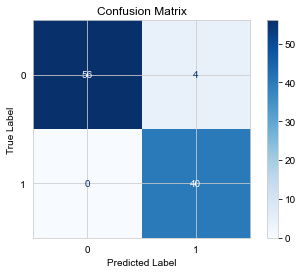

In [194]:
display_confusion_matrix(mlp,X_test,y_test)

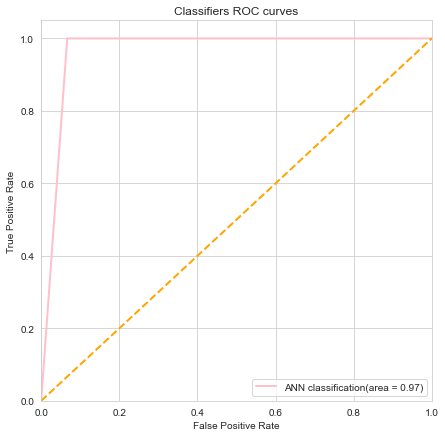

In [195]:
fpr_mlp, tpr2_mlp, threshold_mlp = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr2_mlp)
display_roc(fpr_mlp, tpr2_mlp, "pink", "ANN classification",roc_auc_mlp)